In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")
import pandas as pa
from sympy.plotting import plot3d


## Goals and Commands

#### Goals
1. Quadratic forms
2. Constrained optimization
3. Cholesky decomposition


#### Commands
1. np.linalg.cholesky

### Quadratic Form

#### Example

Let $A=\begin{bmatrix} 3 & 2  \\ 2 & 5  \end{bmatrix}$. Find change of variable ${\bf x}=P{\bf y}$, so that the quadratic form ${\bf x}^TA{\bf x}={\bf y}D{\bf y}$ where D is diagonal. Plot both cases.

#### Solution

In [3]:
A=np.array([[3,2],[2,5]])
D,P=np.linalg.eig(A)
D=np.diag(D)   #creates diagonal matrix with given values on the main diagonal
D

array([[1.76393202, 0.        ],
       [0.        , 6.23606798]])

In [4]:
Asympy=sp.Matrix(A)
Asympy.is_positive_definite

True

In [5]:
P

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

Let's see actual quadratic form in each case:

In [6]:
x1, x2, y1, y2= sp.symbols('x1 x2 y1 y2')
x = sp.Matrix([[x1], [x2]])
y = sp.Matrix([[y1], [y2]])

sp.expand(x.T*A*x) 

⎡    2                 2⎤
⎣3⋅x₁  + 4⋅x₁⋅x₂ + 5⋅x₂ ⎦

In [7]:
y.T*D*y

⎡                   2                      2⎤
⎣1.76393202250021⋅y₁  + 6.23606797749979⋅y₂ ⎦

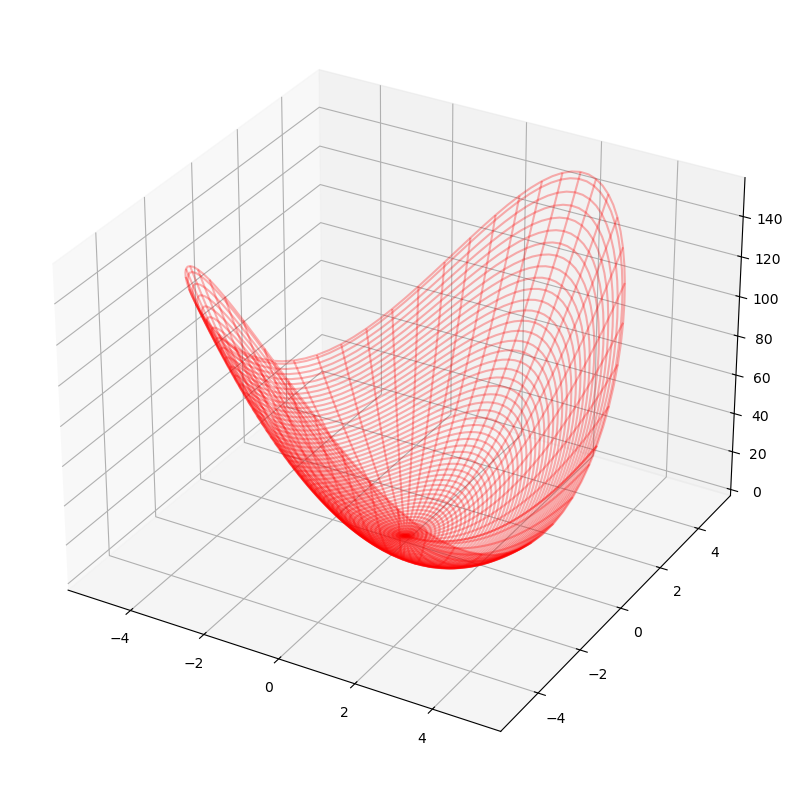

In [8]:
# x-coordinats

t = np.linspace(0,2*np.pi,100)
r= np.linspace(0,5,100)
tm, rm = np.meshgrid(t,r)
x=rm*np.cos(tm)
y=rm*np.sin(tm)


z=3*x**2+4*x*y+5*y**2
fig= plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')

plt.show()

Now let's plot

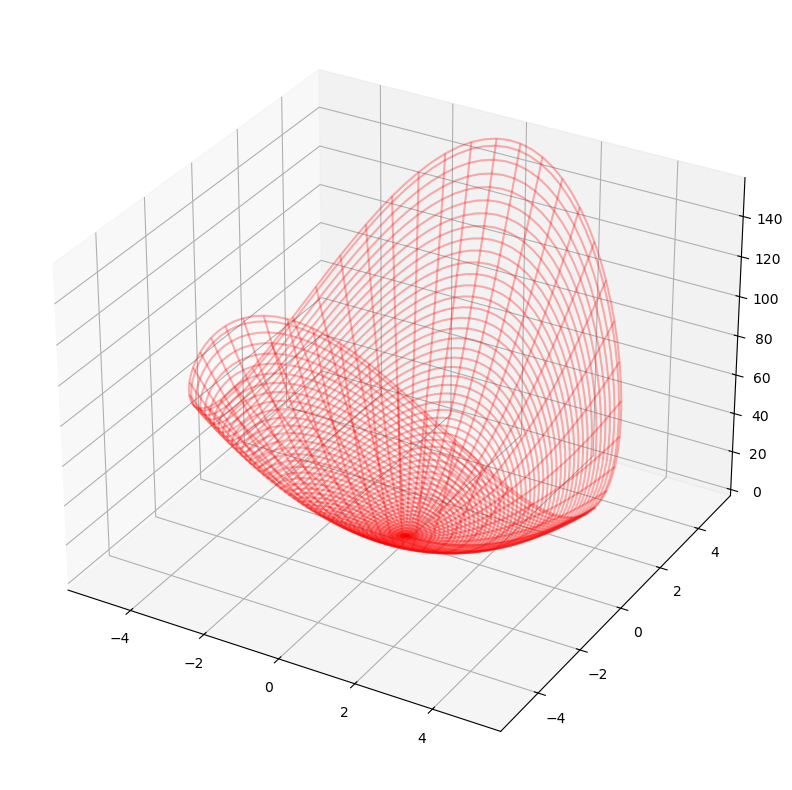

In [9]:
# y-coordinats

t = np.linspace(0,2*np.pi,100)
r= np.linspace(0,5,100)
tm, rm = np.meshgrid(t,r)
x=rm*np.cos(tm)
y=rm*np.sin(tm)
z=1.76393202250021*x**2+6.23606797749979*y**2
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')
plt.show()


#### End of Solution

Next let's use the above plots to see the contors where $||{\bf x}||=1$.

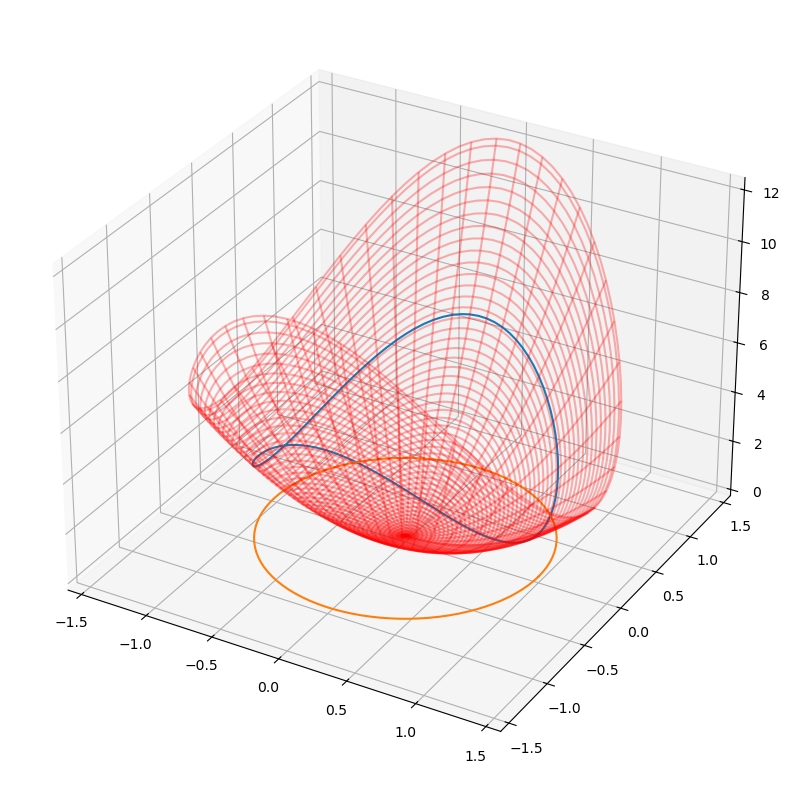

In [10]:
t = np.linspace(0,2*np.pi,100)
r= np.linspace(0,1.4,100)
tm, rm = np.meshgrid(t,r)
x=rm*np.cos(tm)
y=rm*np.sin(tm)

c1, c2 = np.cos(t), np.sin(t)
z=1.76393202250021*x**2+6.23606797749979*y**2
z2=1.76393202250021*c1**2+6.23606797749979*c2**2
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')
ax.plot(c1, c2, z2)
ax.plot(c1, c2, 0)
plt.show()

It is not hard to see that the highest and lowest points on the contour are along axes. By change of variable we did, the axes here correspond to direction of eigenvectors for A:

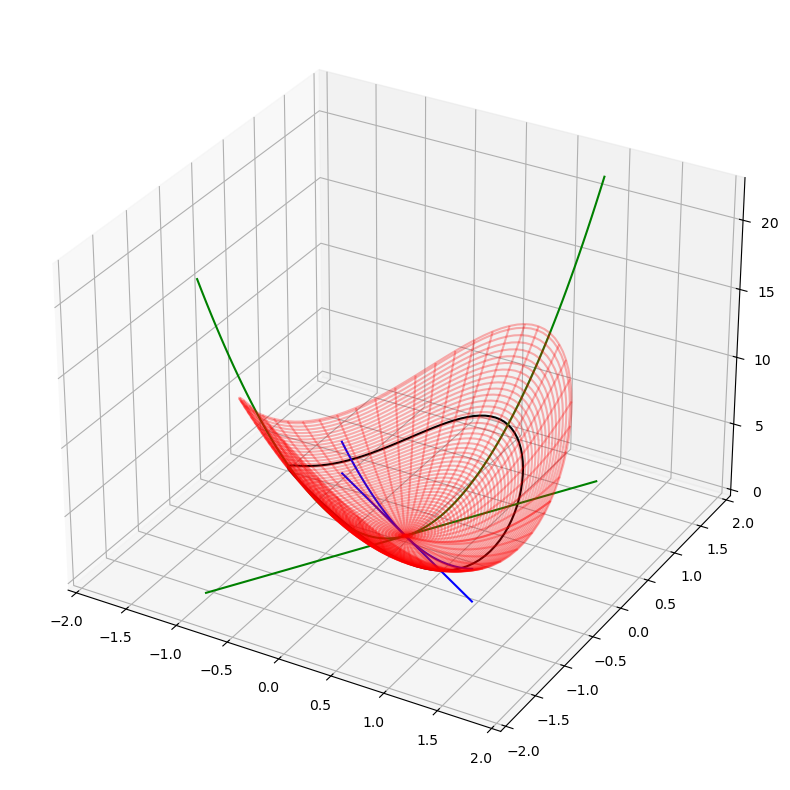

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlim([-2,2])
plt.ylim([-2,2])

t = np.linspace(0,2*np.pi,100)
r= np.linspace(0,1.4,100)
tm, rm = np.meshgrid(t,r)
x=rm*np.cos(tm)
y=rm*np.sin(tm)
c1, c2 = np.cos(t), np.sin(t)

z=3*x**2+4*x*y+5*y**2
z2=3*c1**2+4*c1*c2+5*c2**2
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')
ax.plot(c1, c2, z2, 'black')


# eigendirections and contour on the quadratic form along eigendirections
u=np.linspace(-1,1,100)
ly1=u*P[1][0]/P[0][0]
ly2=u*P[1][1]/P[0][1]

ax.plot(u,ly1,'-b')  
ax.plot(u,ly2,'-g')
z3=3*u**2+4*u*ly1+5*ly1**2
z4=3*u**2+4*u*ly2+5*ly2**2
ax.plot(u, ly1, z3, 'b')
ax.plot(u, ly2, z4, 'g')




plt.show()

### Cholesky Decomposition

We will generaly work with positive definite matricies. To determine if given matrix is positive definite requires knowledge of eigenvalues. However, there is a quicker way to determine this by doing Cholesky factorization. GIven matrix $A$, its Cholesky factorization is $A=LL^T$, where $L$ is lower triangular with positive diagonal entries (or equivalently $A=R^TR$, with $R$ being upper triangular an positive diagonal entries). Such factorization is possible if and only if $A$ is positive definite.

In our above problem, we already know that A is positive definite and we can see its Cholesky factorization exists:

In [12]:
np.linalg.cholesky(A)

array([[1.73205081, 0.        ],
       [1.15470054, 1.91485422]])

Here what happens if a matrix is not positive definite:

In [13]:
B=np.array([[1,3],[3,1]])
np.linalg.eigvals(B)

array([ 4., -2.])

In [14]:
np.linalg.cholesky(B)

LinAlgError: Matrix is not positive definite

Cholesky decomposition is also used as a quick way to solve matrix equations $A{\bf x}={\bf b}$ similar to LU-factorization (granted it works only if A is symmetric and positive definite)